# Problem Statement :
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating.
      Since the problem contains natural language, So I'll use NLP to predict rating on basis of reviews written by people.
The Problem Statement contains two phases:
1) Scrapping Rating and Review for multiple products from multiple websites.I have scrapped from Amazon and Flipkart.
2) Based in the review , rating prediction.

In [1]:
## Importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
## Reading data from csv file
df = pd.read_csv("Rating_Scrapping_data.csv")
df.head()

,Unnamed: 0,Product_Review,Ratings
0,0,Why are there two Boat Rockerz 450? One is pri...,1.0
1,1,I'm writing this review after using it for ove...,5.0
2,2,- Good looks- sturdy- Good built quality- fits...,5.0
3,3,After 25 days of useage I am writing my review...,5.0
4,4,The product is of very poor quality. I bought ...,1.0


In [3]:
## Dropping unnecessary column Unnamed
df.drop('Unnamed: 0',axis =1, inplace = True)

In [4]:
df.head()

,Product_Review,Ratings
0,Why are there two Boat Rockerz 450? One is pri...,1.0
1,I'm writing this review after using it for ove...,5.0
2,- Good looks- sturdy- Good built quality- fits...,5.0
3,After 25 days of useage I am writing my review...,5.0
4,The product is of very poor quality. I bought ...,1.0


In [5]:
df.shape

(61936, 2)

There are 61936 rows and 2 colums.

In [6]:
## Checking data type
df.dtypes

Product_Review     object
Ratings           float64
dtype: object

Product_Review is in string form ,Ratings data type is float.

In [7]:
## Checking value count for Ratings column:
df['Ratings'].value_counts()

5.0    25286
1.0    17895
4.0     9906
3.0     4499
2.0     4350
Name: Ratings, dtype: int64

-> We can see ,there are 5 type of Ratings, and those are in form of (1.0,2.0,3.0,4.0,5.0).
-> Highest number of ratings are 5.0, followed by  rating 1.0. 
-> Lowest number of ratings are rating 2.0 .

In [8]:
## Checking meta data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61936 entries, 0 to 61935
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Review  61636 non-null  object 
 1   Ratings         61936 non-null  float64
dtypes: float64(1), object(1)
memory usage: 967.9+ KB


There are some missing values in Product_Review column.

In [9]:
## Checking missing/Null values:
df.isnull().sum()

Product_Review    300
Ratings             0
dtype: int64

In [10]:
# Replacing missing data with 'Review Not Available' using pandas fillna()
df['Product_Review'].fillna('Review Not Available',inplace=True)

In [11]:
## Again Checking missing/Null values:
df.isnull().sum()

Product_Review    0
Ratings           0
dtype: int64

Now there are not any missing/null values.

# Visualization

Text(0.5, 1.0, 'Ratings Pie Chart')

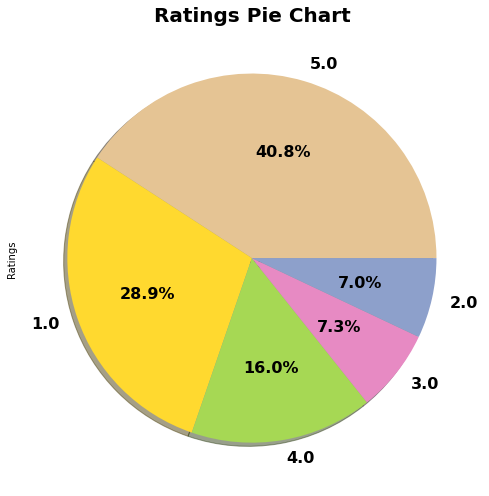

In [19]:
# Pie plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
plt.subplots(1,1,figsize=(15,7))

df['Ratings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, shadow=True)
plt.title('Ratings Pie Chart', fontsize=20,fontweight ='bold')


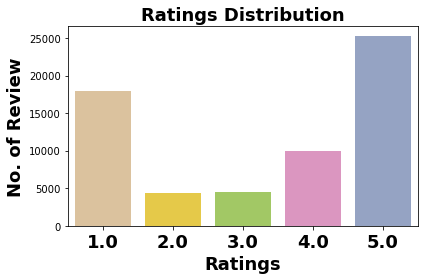

Value Counts of Rating:


5.0    25286
1.0    17895
4.0     9906
3.0     4499
2.0     4350
Name: Ratings, dtype: int64

In [20]:
sns.countplot('Ratings',data=df)
plt.title('Ratings Distribution',fontsize=18,fontweight ='bold')
plt.xlabel("Ratings",fontsize=18,fontweight ='bold')
plt.ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
df['Ratings'].value_counts()


Observations:
-> Around 41 % customers have given 5 Rating,followed by around 29% ,which have given 1 rating.    

# Length before cleaning  dataset:

In [12]:
df['length_before_cleaning'] = df['Product_Review'].map(lambda Product_Review: len(Product_Review))
df


,Product_Review,Ratings,length_before_cleaning
0,Why are there two Boat Rockerz 450? One is pri...,1.0,148
1,I'm writing this review after using it for ove...,5.0,602
2,- Good looks- sturdy- Good built quality- fits...,5.0,296
3,After 25 days of useage I am writing my review...,5.0,483
4,The product is of very poor quality. I bought ...,1.0,434
...,...,...,...
61931,Speaker option is not available...,4.0,34
61932,"Quite satisfied, Good monitor for regular usag...",4.0,147
61933,very nice monitor must buy friends.,5.0,35
61934,Excellent product. I am 100% satisfied,3.0,38


# Text Mining
 Operation perform are as followed:

-> converting string into lower case.

-> Removing Punctuations and other special characters

-> Word Tokenzation

-> Removing Stop Words

-> Stemming and Lemmatising

-> Applying Count Vectoriser



In [13]:
#Importing required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud


# Applying Regular expression for text extraction.


In [14]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
    


In [15]:
# Apply above function for the column Product_Review in the dataset to replace original with cleaned text
clean_text(df, 'Product_Review')
df['Product_Review'].head()


0    two boat rockerz numbr one priced numbr numbr ...
1    writing review using numbr monthsboat best hea...
2    good looks sturdy good built quality fits good...
3    numbr days useage writing review honest boat d...
4    product poor quality bought product numbrth oc...
Name: Product_Review, dtype: object

In [16]:
df['length_after_cleaning'] = df['Product_Review'].map(lambda Product_Review: len(Product_Review))
df


,Product_Review,Ratings,length_before_cleaning,length_after_cleaning
0,two boat rockerz numbr one priced numbr numbr ...,1.0,148,92
1,writing review using numbr monthsboat best hea...,5.0,602,475
2,good looks sturdy good built quality fits good...,5.0,296,222
3,numbr days useage writing review honest boat d...,5.0,483,283
4,product poor quality bought product numbrth oc...,1.0,434,308
...,...,...,...,...
61931,speaker option available,4.0,34,24
61932,quite satisfied good monitor regular usage pla...,4.0,147,108
61933,nice monitor must buy friends,5.0,35,29
61934,excellent product numbr satisfied,3.0,38,33


In [17]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review'] = df['Product_Review'].apply(lambda x: tokenizer.tokenize(x))
df.head()


,Product_Review,Ratings,length_before_cleaning,length_after_cleaning
0,"[two, boat, rockerz, numbr, one, priced, numbr...",1.0,148,92
1,"[writing, review, using, numbr, monthsboat, be...",5.0,602,475
2,"[good, looks, sturdy, good, built, quality, fi...",5.0,296,222
3,"[numbr, days, useage, writing, review, honest,...",5.0,483,283
4,"[product, poor, quality, bought, product, numb...",1.0,434,308


# Stemming & Lemmatization


In [21]:
!pip install gensim

In [21]:
import gensim
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result


In [22]:
#Processing review with above Function
processed_review = []

for doc in df.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]


61936


[['two',
  'boat',
  'rockerz',
  'numbr',
  'one',
  'price',
  'numbr',
  'numbr',
  'one',
  'price',
  'numbr',
  'buy',
  'numbr',
  'numbr',
  'one',
  'see'],
 ['write',
  'review',
  'use',
  'numbr',
  'monthsboat',
  'best',
  'headphon',
  'awesom',
  'numbr',
  'build',
  'qualiti',
  'excel',
  'pretti',
  'solid',
  'numbr',
  'sound',
  'crystal',
  'clear',
  'nois',
  'cancel',
  'great',
  'numbr',
  'base',
  'okay',
  'numbr',
  'numbr',
  'rat',
  'give',
  'numbr',
  'bluetooth',
  'connect',
  'fast',
  'numbr',
  'rang',
  'good',
  'numbr',
  'numbr',
  'max',
  'numbr',
  'charg',
  'take',
  'much',
  'time',
  'use',
  'around',
  'numbr',
  'numbr',
  'hour',
  'numbr',
  'numbr',
  'min',
  'charg',
  'numbr',
  'batteri',
  'backup',
  'great',
  'full',
  'charg',
  'listen',
  'non',
  'stop',
  'music',
  'numbr',
  'numbr',
  'day',
  'overal',
  'price',
  'rang',
  'one',
  'best',
  'high',
  'recommend'],
 ['good',
  'look',
  'sturdi',
  'good',


In [23]:
df['clean_review']=processed_review  #Assigning this to the dataframe
df.head()

,Product_Review,Ratings,length_before_cleaning,length_after_cleaning,clean_review
0,"[two, boat, rockerz, numbr, one, priced, numbr...",1.0,148,92,"[two, boat, rockerz, numbr, one, price, numbr,..."
1,"[writing, review, using, numbr, monthsboat, be...",5.0,602,475,"[write, review, use, numbr, monthsboat, best, ..."
2,"[good, looks, sturdy, good, built, quality, fi...",5.0,296,222,"[good, look, sturdi, good, build, qualiti, fit..."
3,"[numbr, days, useage, writing, review, honest,...",5.0,483,283,"[numbr, day, useag, write, review, honest, boa..."
4,"[product, poor, quality, bought, product, numb...",1.0,434,308,"[product, poor, qualiti, buy, product, numbrth..."


In [24]:
df['Product_Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()

,Product_Review,Ratings,length_before_cleaning,length_after_cleaning,clean_review
0,two boat rockerz numbr one price numbr numbr o...,1.0,148,92,"[two, boat, rockerz, numbr, one, price, numbr,..."
1,write review use numbr monthsboat best headpho...,5.0,602,475,"[write, review, use, numbr, monthsboat, best, ..."
2,good look sturdi good build qualiti fit good h...,5.0,296,222,"[good, look, sturdi, good, build, qualiti, fit..."
3,numbr day useag write review honest boat do go...,5.0,483,283,"[numbr, day, useag, write, review, honest, boa..."
4,product poor qualiti buy product numbrth ocob ...,1.0,434,308,"[product, poor, qualiti, buy, product, numbrth..."


# Plotting wordcloud for different ratings

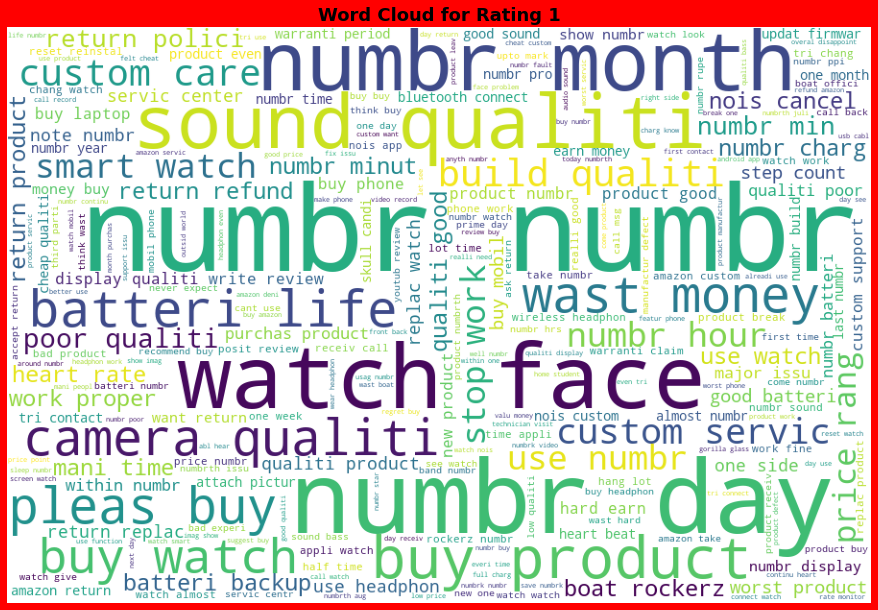

In [26]:
one = df['Product_Review'][df['Ratings']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad = 0)
plt.show()


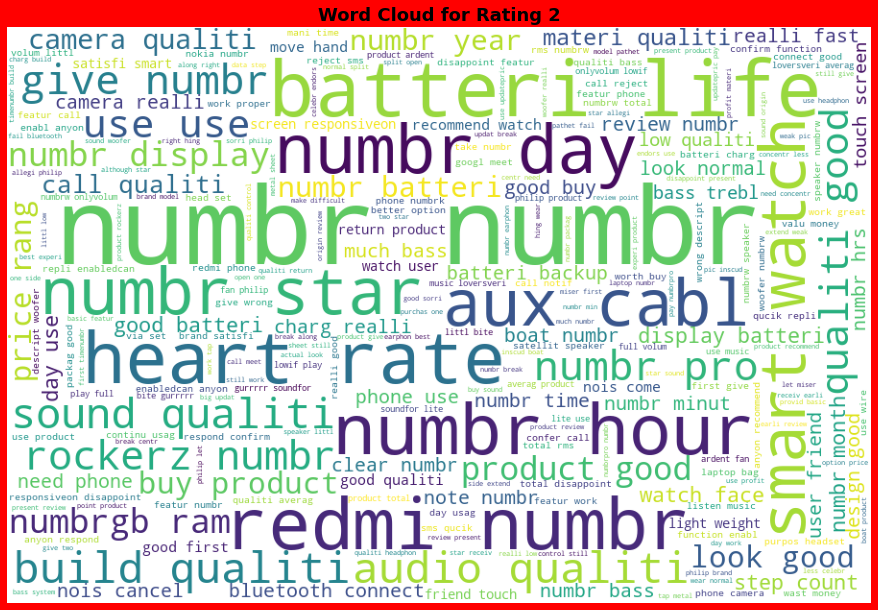

In [27]:
two = df['Product_Review'][df['Ratings']==2.0]
two_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(two))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(two_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad = 0)
plt.show()


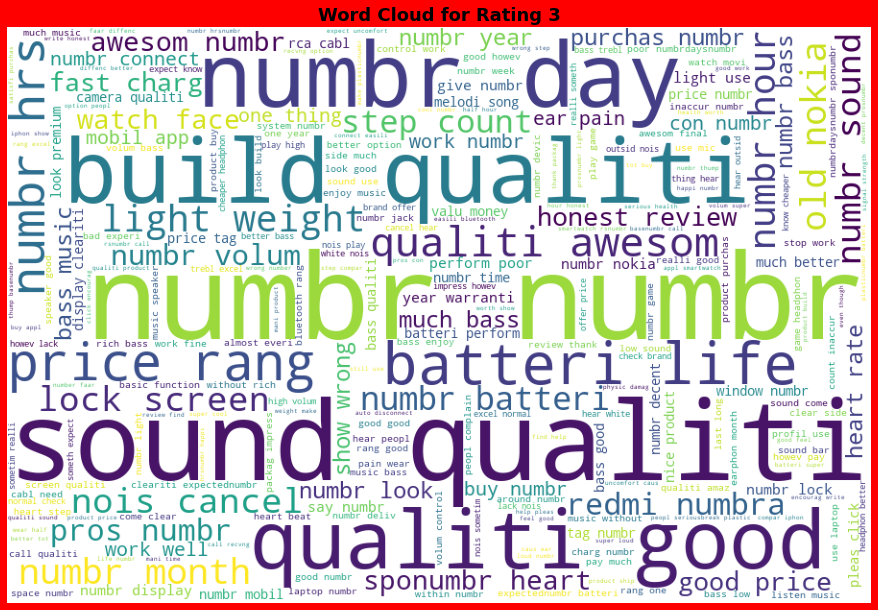

In [28]:
three = df['Product_Review'][df['Ratings']==3.0]
three_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(three))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(three_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad = 0)
plt.show()


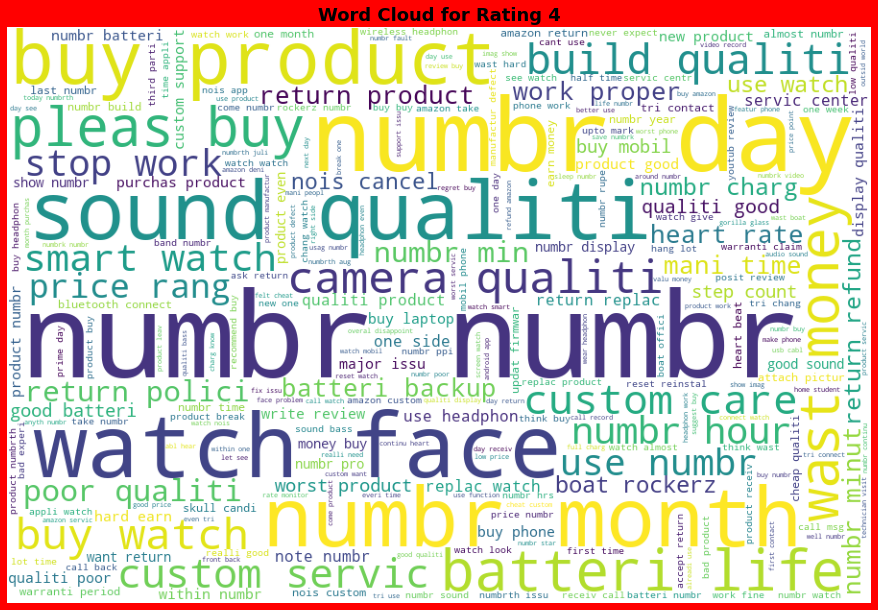

In [29]:
four = df['Product_Review'][df['Ratings']==1.0]
four_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(four))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(four_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad = 0)
plt.show()


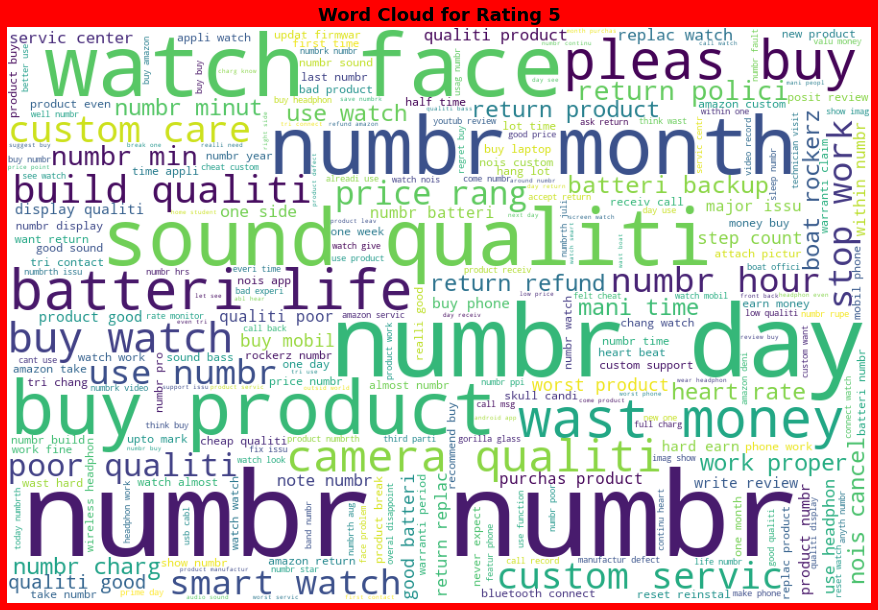

In [30]:
five = df['Product_Review'][df['Ratings']==1.0]
five_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(four))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(five_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad = 0)
plt.show()


# Text Vectorization to convert text into numeric


In [33]:
tfid = TfidfVectorizer()
X = tfid.fit_transform(df['Product_Review'])
Y = df[['Ratings']]

In [34]:
X.shape

(61936, 5369)

In [35]:
Y.shape

(61936, 1)

# Model Building

In [47]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate, cross_val_predict,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score


# Finding best Random State

In [39]:
maxAcc = 0
maxRS = 0
for i in range(0,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = i,test_size = 0.30)
    lgr = LogisticRegression()
    lgr.fit(X_train,Y_train)
    pred = lgr.predict(X_test)
    acc = accuracy_score(Y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Best Accuracy is: ",maxAcc, "at random state ",maxRS )        

Best Accuracy is:  0.8694903395942092 at random state  180


In [40]:
def sort_model(estimator, X_train, Y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, X_train, Y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes


In [44]:
models = [LogisticRegression(), MultinomialNB(), RandomForestClassifier(),
          DecisionTreeClassifier(), KNeighborsClassifier(),
          AdaBoostClassifier(), GradientBoostingClassifier(), 
          ]

model_names = ["LogisticRegression", "MultinomialNB", "Random Forest",
               "Decision Tree", "KNeighbors", "Ada Boost", 
               "Gradient Boosting"]

In [48]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"....................................................................running {model_names[model]}")
    
    clf_scores = sort_model(models[model], X_train, Y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])




Step 1 of 7
....................................................................running LogisticRegression
Accuracy: 0.8649521393149578 - (std: 0.004186860768232362)
Precision: 0.8657784108744272 - (std: 0.004295841687946223)
Recall: 0.8649521393149578 - (std: 0.004186860768232362)
f1: 0.8641865354768331 - (std: 0.0041719005797206206)


Step 2 of 7
....................................................................running MultinomialNB
Accuracy: 0.8116018913620113 - (std: 0.0025104216613125643)
Precision: 0.8194755563005446 - (std: 0.002257412479221953)
Recall: 0.8116018913620113 - (std: 0.0025104216613125643)
f1: 0.8076369782033279 - (std: 0.002420274484832271)


Step 3 of 7
....................................................................running Random Forest
Accuracy: 0.8691269749740513 - (std: 0.0029568714961441173)
Precision: 0.8702223936967943 - (std: 0.002887893076815981)
Recall: 0.8691269749740513 - (std: 0.0029568714961441173)
f1: 0.8684467415124276 - (std: 0.00290031743

In [49]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
2,Random Forest,0.869127,0.870222,0.869127,0.868447
3,Decision Tree,0.864745,0.865242,0.864745,0.864254
0,LogisticRegression,0.864952,0.865778,0.864952,0.864187
4,KNeighbors,0.853765,0.853867,0.853765,0.853291
6,Gradient Boosting,0.818798,0.830742,0.818798,0.814991
1,MultinomialNB,0.811602,0.819476,0.811602,0.807637
5,Ada Boost,0.549648,0.551437,0.549648,0.502158


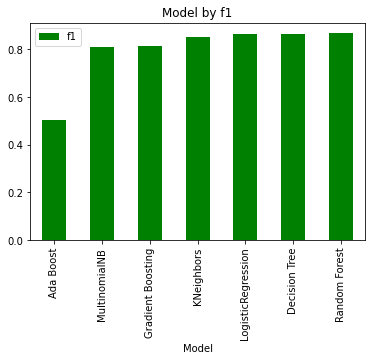

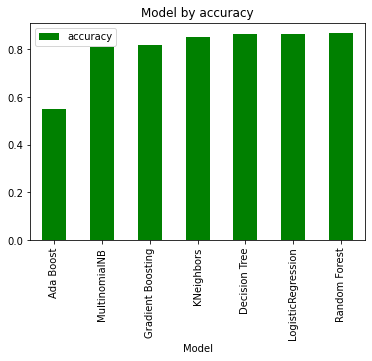

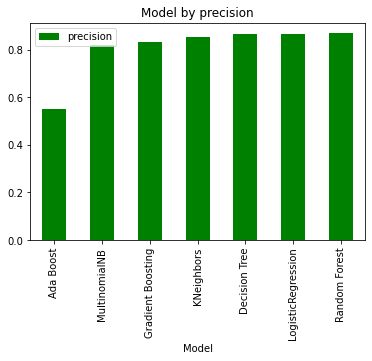

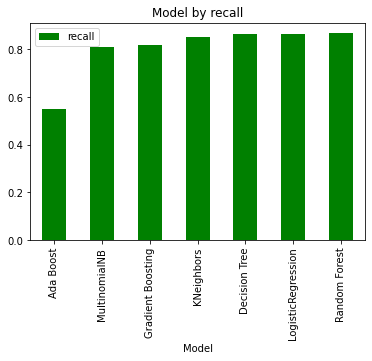

In [50]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = 'green')
    plt.title(f"Model by {metric}")
    plt.show()

Random Forest has given better results than other models.So will do hyper parameter tuning for Random Forest model.

# HyperParameter tuning

In [52]:
param_grid = [
    {"n_estimators": range(20, 200, 20), 
     "bootstrap": [True, False],
     "criterion": ["gini", "entropy"],   
     "max_depth": [2, 4, 6, 8, 10, 12, 14, None],
     "max_features": ["auto", "sqrt", "log2"], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4],
     }
]

rf  = RandomForestClassifier(random_state = 180,)
rf_random = RandomizedSearchCV(rf,param_grid,cv = 3,)
rf_random.fit(X_train,Y_train)
params = rf_random.best_params_
print("Best Params are ",params)
best_score = rf_random.best_score_
print("Best Score is ",rf_random.best_score_)

Best Params are  {'n_estimators': 180, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Best Score is  0.8677431237657524


# Providing best parameters to RandomForest model:-

In [54]:
rf_final = RandomForestClassifier(n_estimators = 180,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=None,
                                 criterion='entropy',bootstrap = True)
rf_final.fit(X_train,Y_train)
rf_pred = rf_final.predict(X_test)
print('Final Random Forest Classifier Model')
print('Accuracy Score :', accuracy_score(Y_test, rf_pred))
print('\n')
print('Confusion matrix of Random Forest Classifier :',confusion_matrix(Y_test, rf_pred))
print('\n')
print('Classification Report of Random Forest Classifier: ',classification_report(Y_test, rf_pred))


Final Random Forest Classifier Model
Accuracy Score : 0.8678219686776815


Confusion matrix of Random Forest Classifier : [[4777   85   32   97  383]
 [  74 1052   25   31  123]
 [ 140   18 1081   11   93]
 [ 219   12   30 2333  397]
 [ 453   45   63  125 6882]]


Classification Report of Random Forest Classifier:                precision    recall  f1-score   support

         1.0       0.84      0.89      0.87      5374
         2.0       0.87      0.81      0.84      1305
         3.0       0.88      0.80      0.84      1343
         4.0       0.90      0.78      0.84      2991
         5.0       0.87      0.91      0.89      7568

    accuracy                           0.87     18581
   macro avg       0.87      0.84      0.85     18581
weighted avg       0.87      0.87      0.87     18581



# Confusion Matrix for final model

In [57]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
print("Confusion matrix:\n\n", multilabel_confusion_matrix(Y_test, rf_pred))


Confusion matrix:

 [[[12321   886]
  [  597  4777]]

 [[17116   160]
  [  253  1052]]

 [[17088   150]
  [  262  1081]]

 [[15326   264]
  [  658  2333]]

 [[10017   996]
  [  686  6882]]]


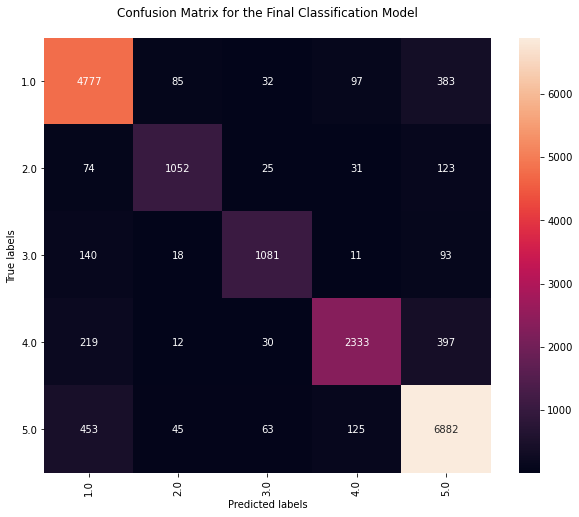

In [64]:
import matplotlib.ticker as plticker
rating_stars = [1.0, 2.0, 3.0, 4.0, 5.0]

plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size
ax= plt.subplot()
cm = confusion_matrix(np.asarray(Y_test), np.asarray(rf_pred))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
ax.set_xticklabels(rating_stars); ax.set_yticklabels(rating_stars);
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()


# Saving the model

In [65]:
import pickle
filename = 'Rating_Prediction.pkl'
pickle.dump(rf_final,open(filename,'wb'))


# Conclusion

In [76]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
X_test.shape

(18581, 5369)

In [90]:
a = np.array(Y_test)
a

array([[5.],
       [1.],
       [5.],
       ...,
       [5.],
       [1.],
       [1.]])

In [92]:
predict = rf_final.predict(X_test)
pd.DataFrame({"Original" : np.ravel(a),
              "Predicted" : predict,
             }
            )

,Original,Predicted
0,5.0,5.0
1,1.0,1.0
2,5.0,5.0
3,5.0,5.0
4,5.0,3.0
...,...,...
18576,4.0,1.0
18577,1.0,1.0
18578,5.0,5.0
18579,1.0,1.0
